In [2]:
%load_ext autoreload
%autoreload 2

import cstrees.cstree as ct
import numpy as np
import networkx as nx
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[0, [0, 1], [0, 1]]


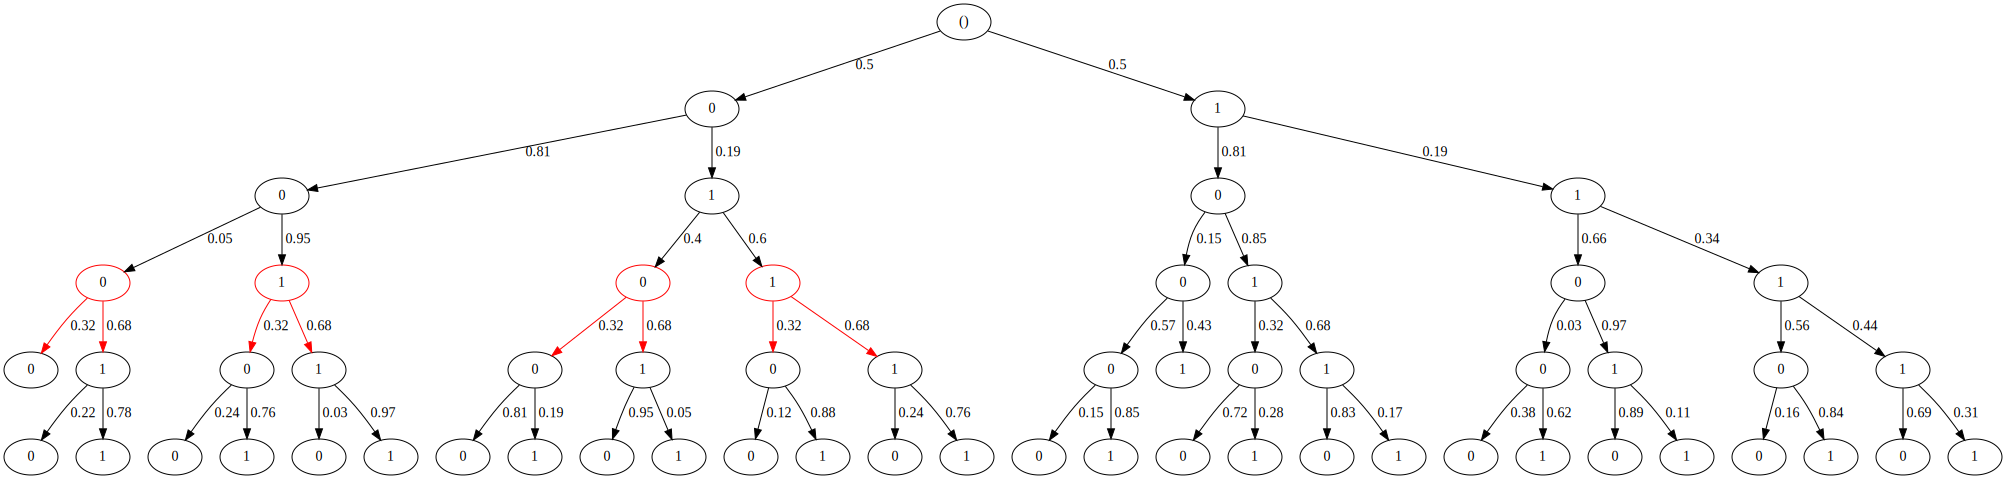

In [3]:
import numpy as np
np.random.seed(3)
p = 5
co = ct.CausalOrder(range(1, p+1))
tree = ct.CStree(co)
cards = [2] * p
tree.set_cardinalities([None] + cards)

stage = ct.sample_random_stage(cards, 3)
stage.color = "red"
print(stage)

tree.add_stages({3:[stage]})
x = tree.sample(100)
#print(x)
a = tree.plot()
a

[[1 0 1 1 0]
 [0 1 0 1 0]
 [0 1 0 1 0]
 [1 0 1 0 0]
 [0 0 1 0 1]
 [0 0 1 1 1]
 [0 0 1 0 1]
 [1 0 0 0 1]
 [0 0 1 1 1]
 [1 0 1 1 0]]


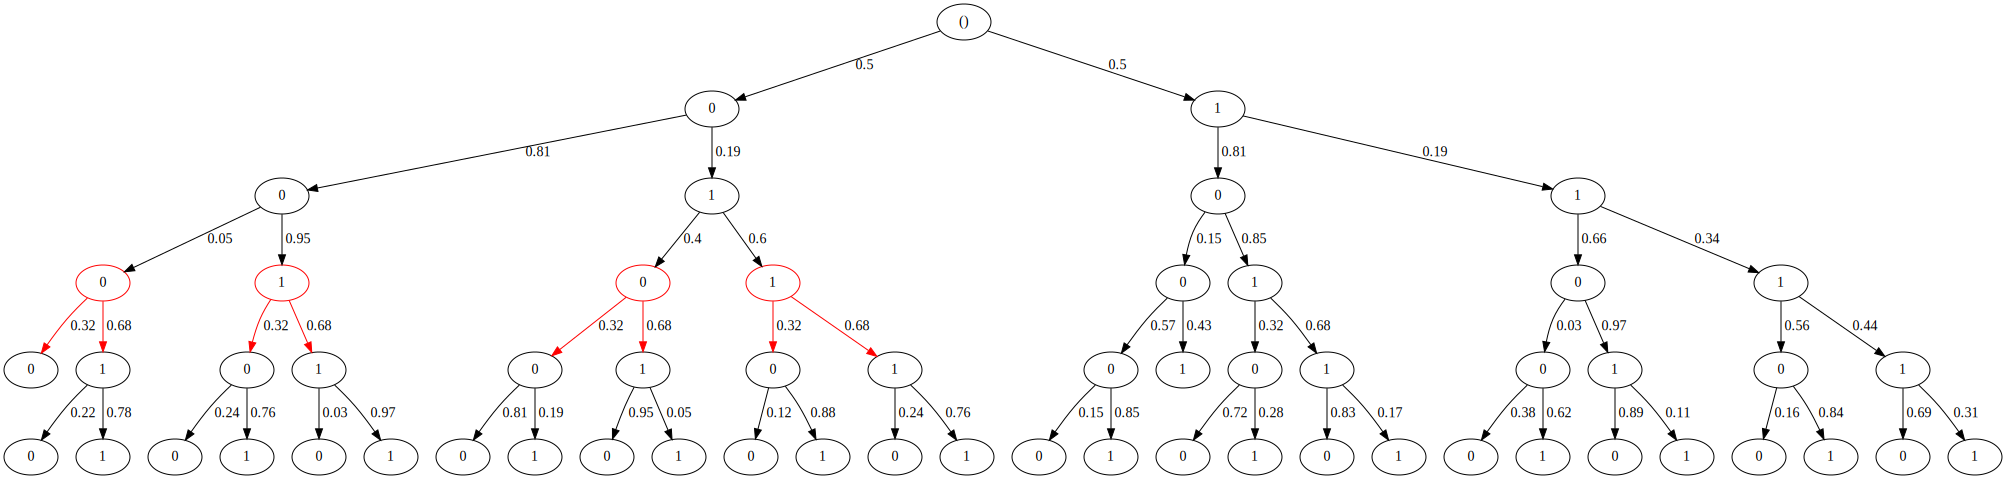

In [4]:
x = tree.sample(10)
print(x)
a = tree.plot()
a


3


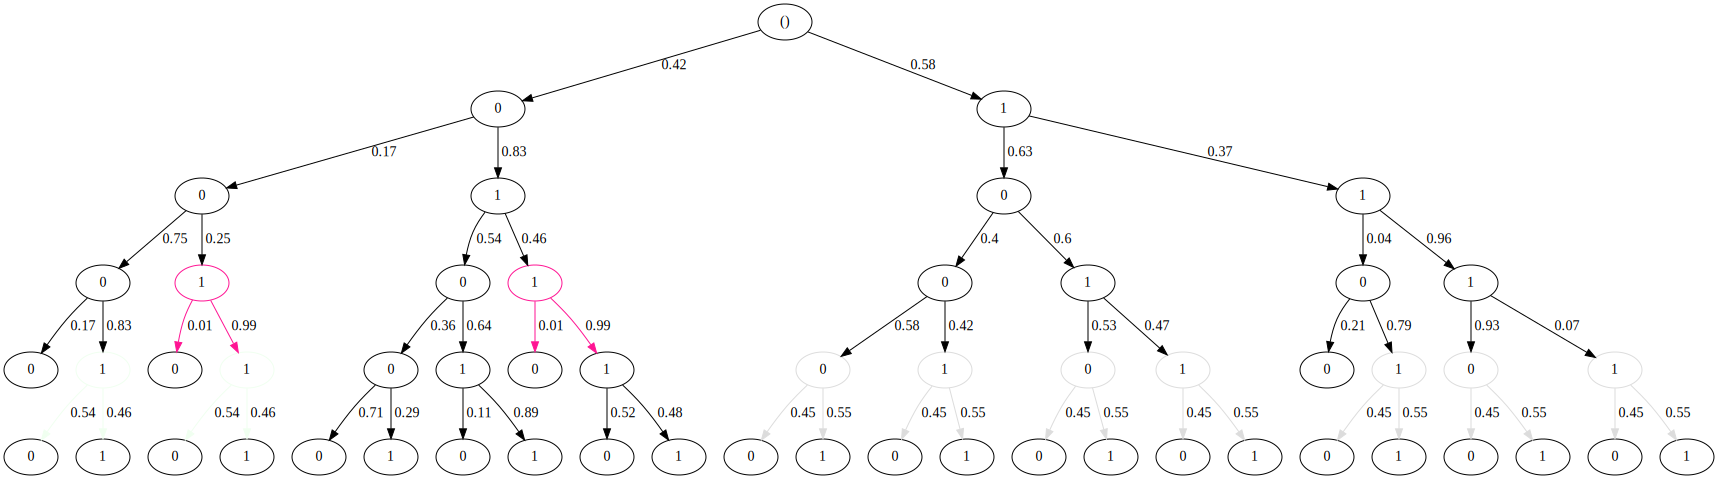

In [5]:
seed=9
np.random.seed(seed)#9
random.seed(seed)

p = 5
t = ct.sample_cstree(p)
print()

ns = 0
for l, sl in t.stages.items():
    for s in sl:
        ns+=1
print(ns)
t.sample(150)
a = t.plot()
a

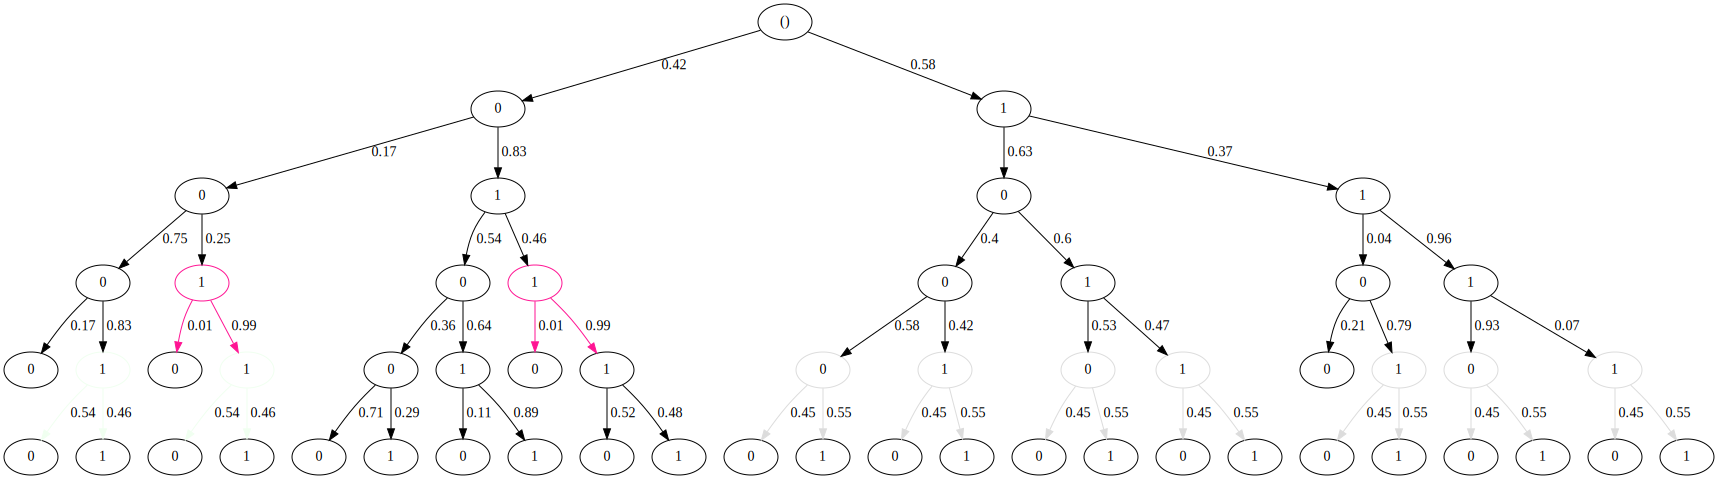

In [6]:
t.sample(5)
a = t.plot()
a


In [7]:
csis = t.csi_relations()
for key, val in csis.items():
    print("Context: {}".format(key))
    for v in val:
        print()
        print(v.ci)
        print("From decomposition:")
        for x in ct.decomposition(v.ci):
            print(str(x))
        print("From weak union:")
        for x in ct.weak_union(v.ci):
            print(str(x))
    print("")

Context: X1=0, X3=1

X2 ⊥ X4
From decomposition:
From weak union:

Context: X1=1

X2, X3, X4 ⊥ X5
From decomposition:
X2 ⊥ X5
X3 ⊥ X5
X4 ⊥ X5
From weak union:
X3, X4 ⊥ X5 | X2
X2, X4 ⊥ X5 | X3
X2, X3 ⊥ X5 | X4
X4 ⊥ X5 | X2, X3
X3 ⊥ X5 | X2, X4
X2 ⊥ X5 | X3, X4

Context: X1=0, X2=0, X4=1

X3 ⊥ X5
From decomposition:
From weak union:



In [8]:
co = t.co
adjmats = ct.csi_relations_to_dags(csis, co)
graphs=[(key,graph) for key, graph in adjmats.items()]

Context: X1=0, X3=1


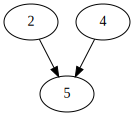

In [9]:
print("Context: {}".format(graphs[0][0]))

ct.plot(graphs[0][1])


Context: X1=1


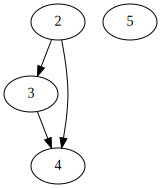

In [10]:
print("Context: {}".format(graphs[1][0]))
ct.plot(graphs[1][1])

Context: X1=0, X2=0, X4=1


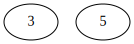

In [11]:
print("Context: {}".format(graphs[2][0]))


ct.plot(graphs[2][1])

In [12]:
t.sample(10)

array([[0, 1, 0, 1, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1],
       [1, 0, 1, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 1, 0, 1],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1]])